# Inspiration
Understand customer demographics and buying behavior. Use predictive analytics to analyze the most profitable customers and how they interact. Take targeted actions to increase profitable customer response, retention, and growth.

# Data Description

We can dowload the dataset at [Kaggle](https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data)

# Overview

**1. Understand the nature of data (Histograms, boxplots, etc.)**

**2. Data Exploration**

**3. Data Cleaning**

**4. Customer Analysis**

# Load data

In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# load data
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
# quickly look at our data fields, datatype and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# Light Data Exploration

In [ ]:
# check duplicated customers
print(any(df['Customer'].duplicated()))

False


In [ ]:
# to better understand numeric data, 
# we uses .describe() method 
# which gives us understanding of the central tendencies of the data
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [ ]:
# quickly get numeric columns
df.describe().columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [ ]:
# look at numeric and categorical variable separately
df_num = df[df.describe().columns]
df_cat = df[
            df.columns.difference(
                list(df_num.columns) + ['Customer', 'Effective To Date']
            )
          ]

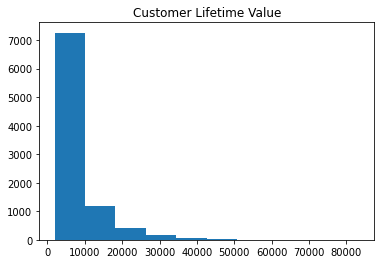

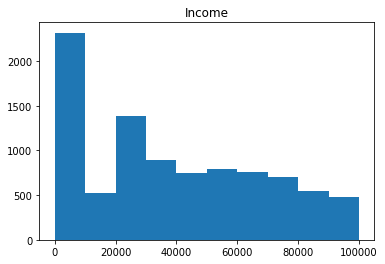

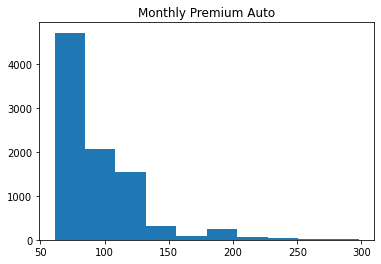

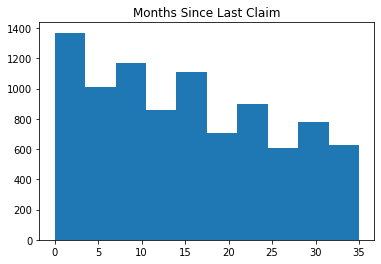

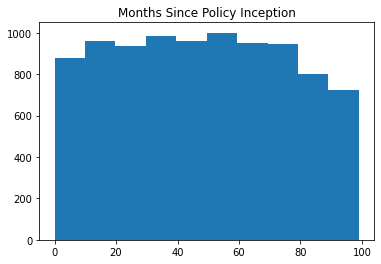

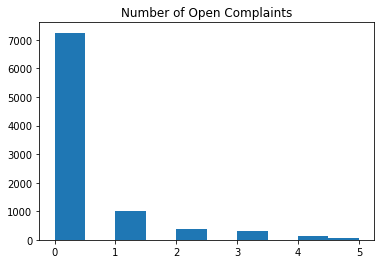

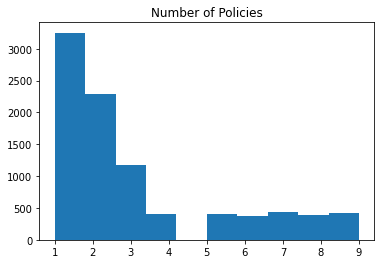

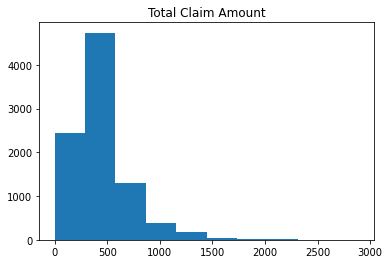

In [ ]:
#distributions for all numeric variables 
for c in df_num.columns:
    plt.hist(df_num[c])
    plt.title(c)
    plt.show()

                               Customer Lifetime Value  ...  Total Claim Amount
Customer Lifetime Value                       1.000000  ...            0.226451
Income                                        0.024366  ...           -0.355254
Monthly Premium Auto                          0.396262  ...            0.632017
Months Since Last Claim                       0.011517  ...            0.007563
Months Since Policy Inception                 0.009418  ...            0.003335
Number of Open Complaints                    -0.036343  ...           -0.014241
Number of Policies                            0.021955  ...           -0.002354
Total Claim Amount                            0.226451  ...            1.000000

[8 rows x 8 columns]


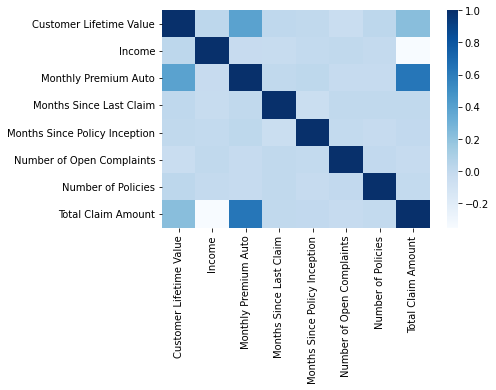

In [ ]:
print(df_num.corr())
sns.heatmap(df_num.corr(), cmap='Blues')

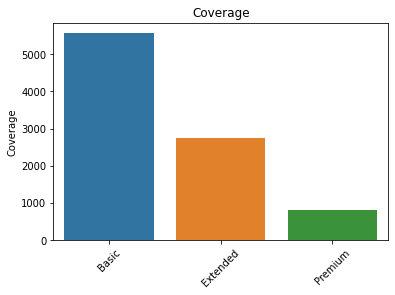

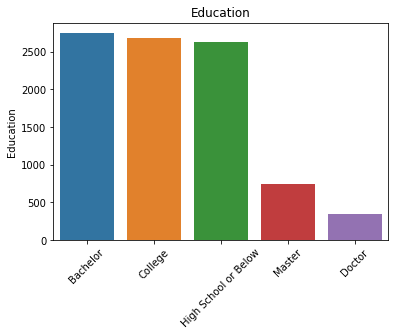

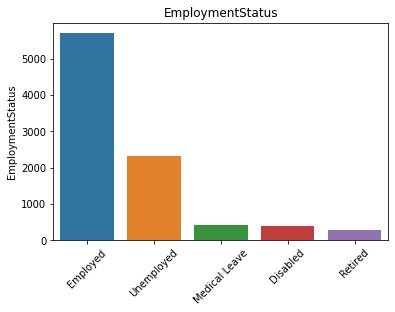

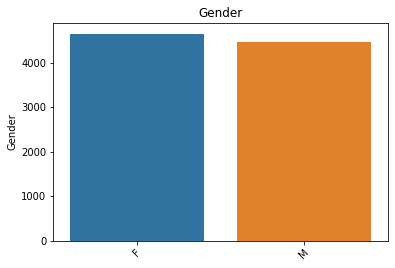

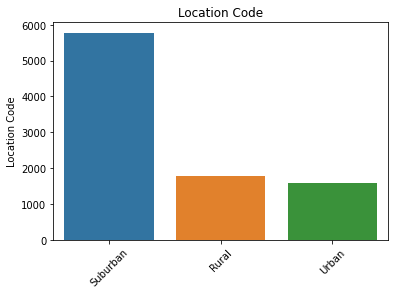

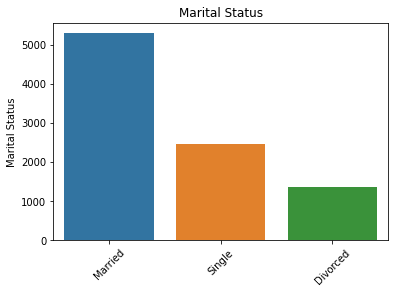

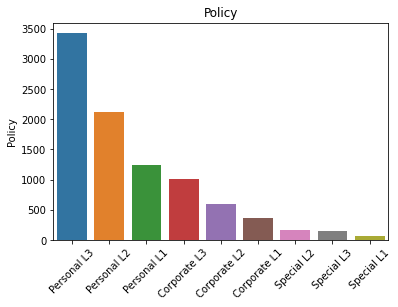

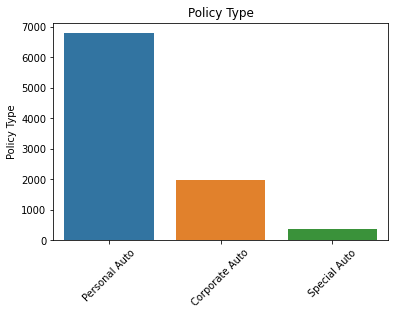

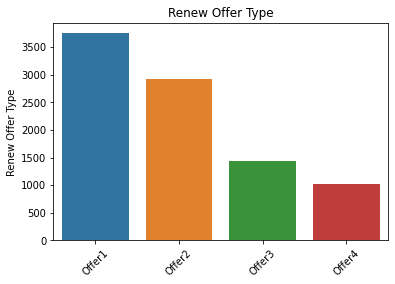

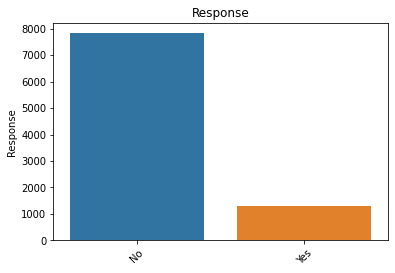

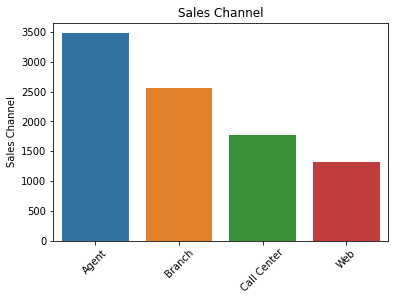

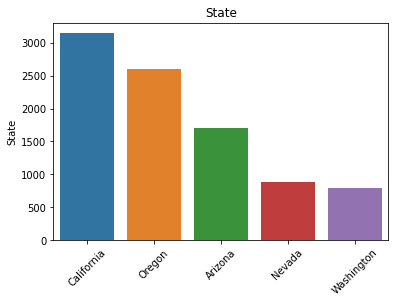

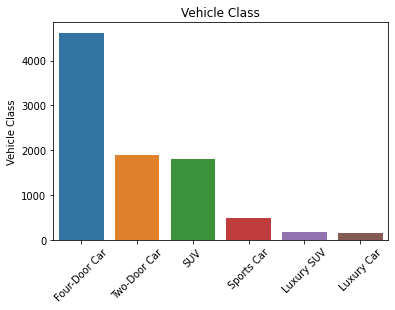

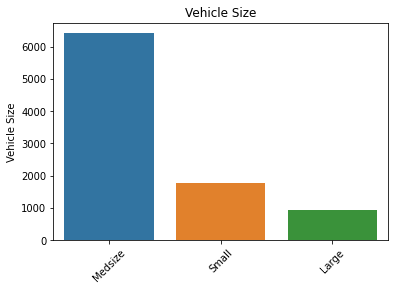

In [ ]:
for c in df_cat.columns:
    sns.barplot(
        x = df_cat[c].value_counts().index, 
        y = df_cat[c].value_counts(),
    ).set_title(c)
    
    plt.xticks(rotation=45)
    plt.show()

# Customer Analysis

## Engagement Rate

Column `Response` indicates that whether a customer have responded to a marketing activities. I will use this field as a measure of customer engagement.

**Steps**:
- Overall Engagement Rate
- Engagement across Offer Types
- Engagement across Offer Types and Vehicle Class
- Engagement across Sales Channels
- Engagement across Sales Channels and Vehicle Size
- Engagement w.r.t Total Claim Amount

In [ ]:
# look through unique values of column `Response`
df['Response'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# calculate overall response rate, i.e. engagement rate

df['Response'] = df['Response'].apply(lambda x: 1 if x=='Yes' else 0)

print(f"Response/ Engagement rate: {df['Response'].mean() * 100} %")

Response/ Engagement rate: 14.320122618786948 %


There are a significant amount of customers that have not responded in marketing efforts.

In [ ]:
# compare engagement across Renew Offer Type

engagement_rate_by_offertypes_df = df.loc[
    df['Response']==1
].groupby(
    'Renew Offer Type'
).count()['Response'] / df.groupby('Renew Offer Type').count()['Response']

engagement_rate_by_offertypes_df

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Response, dtype: float64

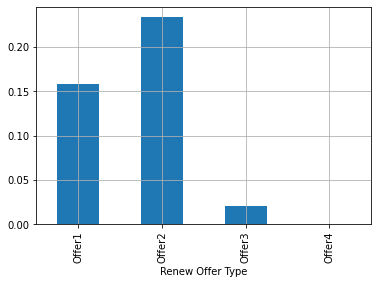

In [ ]:
# to make a easier consideration,
# I visualize the engagement rate with a bar chart

engagement_rate_by_offertypes_df.plot.bar(grid=True)

Customers with `Offer2` has the highest engagement rate (over 23%).
Customers with `Offer3` and `Offer4` has extremely low engagement rate. 

In [ ]:
# I want to get more deeper understand customers by
# adding one more field `Vehicle Class` on focus

engagement_rate_by_offertypes_vehicleclass_df = df.loc[
    df['Response']==1
].groupby(
    ['Renew Offer Type', 'Vehicle Class']
).count()['Response'] / df.groupby('Renew Offer Type').count()['Response']

engagement_rate_by_offertypes_vehicleclass_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Response, dtype: float64

In [ ]:
# transform results to a more readable one
engagement_rate_by_offertypes_vehicleclass_df = engagement_rate_by_offertypes_vehicleclass_df.unstack().fillna(0)
engagement_rate_by_offertypes_vehicleclass_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


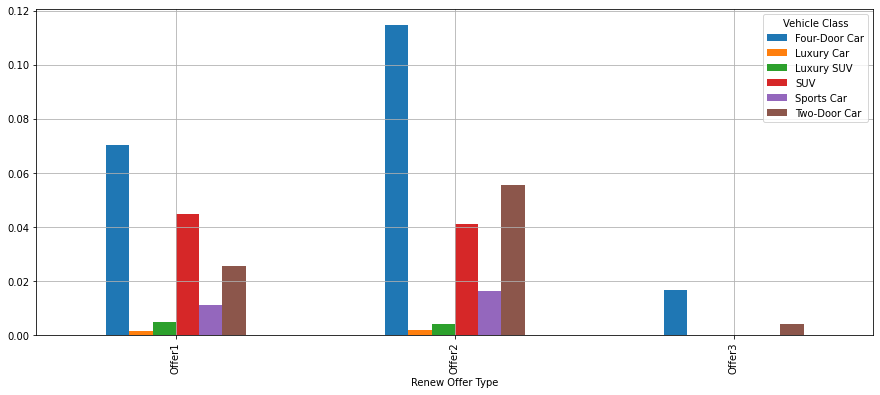

In [ ]:
# visualize
engagement_rate_by_offertypes_vehicleclass_df.plot.bar(figsize=(15,6), grid=True)

In [ ]:
# compare engagement across channel sales
engagement_rate_by_saleschannel = df.loc[
    df['Response'] == 1
].groupby([
    'Sales Channel'
]).count()['Response']/df.groupby('Sales Channel').count()['Response']

engagement_rate_by_saleschannel

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Response, dtype: float64

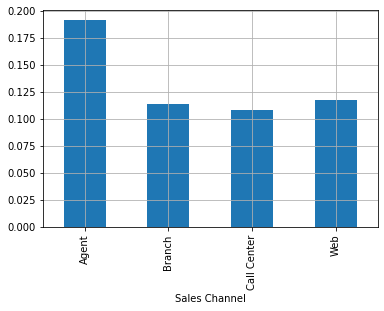

In [ ]:
# visualize
engagement_rate_by_saleschannel.plot.bar(grid=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


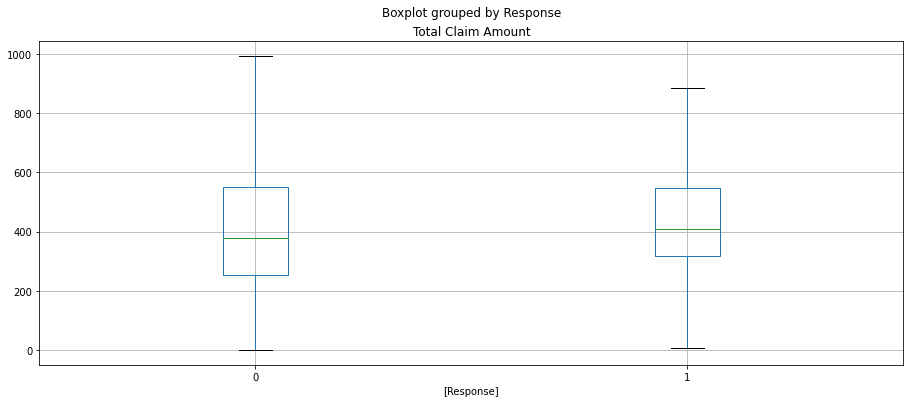

In [ ]:
# look at the distribution of engagement across Total Claim Amount
df[['Response', 'Total Claim Amount']].boxplot(
    by='Response',
    showfliers=False,
    figsize=(15,6)
)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


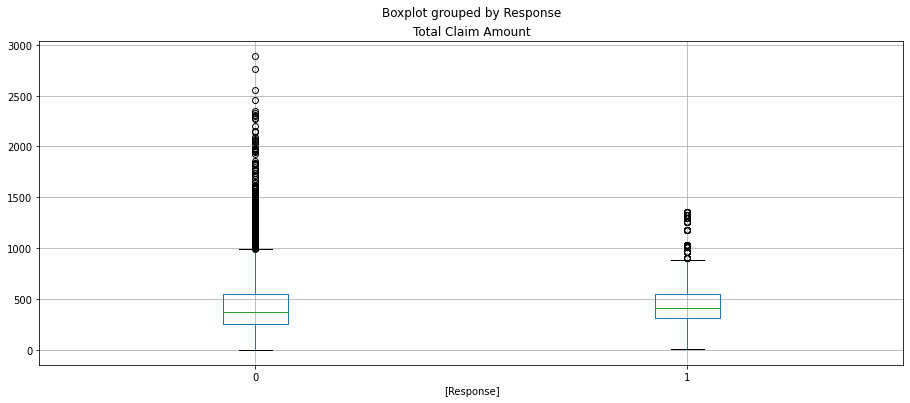

In [ ]:
# look at the distribution of engagement across Total Claim Amount
df[['Response', 'Total Claim Amount']].boxplot(
    by='Response',
    showfliers=True,
    figsize=(15,6)
)

## Regression Analysis

I focus on customer engagement. So, my target variables will be `Response`.
- Build a logistic models with numeric continous variables.
- Build a logistic models with categorical variables.

In [ ]:
df_num.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [ ]:
df_cat.columns

Index(['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy', 'Policy Type', 'Renew Offer Type',
       'Response', 'Sales Channel', 'State', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [ ]:
for c in df_cat.columns.difference(['Response']):
  unique_values = df[c].unique()
  print(f"df['{c}'],\ncategories={unique_values},")
  print()

df['Coverage'],
categories=['Basic' 'Extended' 'Premium'],

df['Education'],
categories=['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor'],

df['EmploymentStatus'],
categories=['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired'],

df['Gender'],
categories=['F' 'M'],

df['Location Code'],
categories=['Suburban' 'Rural' 'Urban'],

df['Marital Status'],
categories=['Married' 'Single' 'Divorced'],

df['Policy'],
categories=['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3'],

df['Policy Type'],
categories=['Corporate Auto' 'Personal Auto' 'Special Auto'],

df['Renew Offer Type'],
categories=['Offer1' 'Offer3' 'Offer2' 'Offer4'],

df['Sales Channel'],
categories=['Agent' 'Call Center' 'Web' 'Branch'],

df['State'],
categories=['Washington' 'Arizona' 'Nevada' 'California' 'Oregon'],

df['Vehicle Class'],
categories=['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car'],

In [ ]:
cat = pd.Categorical(
    df['Coverage'], 
    categories=['Basic', 'Extended', 'Premium'],
)

df['CoverageFactorized'] = cat.codes

In [ ]:
cat = pd.Categorical(
    df['Education'], 
    categories=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']
)

df['EducationFactorized'] = cat.codes

In [ ]:
df = pd.get_dummies(df, columns=['EmploymentStatus'])

In [ ]:
cat = pd.Categorical(
    df['Gender'],
    categories=['F', 'M'],
)

df['GenderFactorized'] = cat.codes

In [ ]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CoverageFactorized,EducationFactorized,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,GenderFactorized
0,BU79786,Washington,2763.519279,0,Basic,Bachelor,2/24/11,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0,1,0,1,0,0,0,0
1,QZ44356,Arizona,6979.535903,0,Extended,Bachelor,1/31/11,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,1,0,0,0,0,1,0
2,AI49188,Nevada,12887.431650,0,Premium,Bachelor,2/19/11,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,1,0,1,0,0,0,0
3,WW63253,California,7645.861827,0,Basic,Bachelor,1/20/11,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0,1,0,0,0,0,1,1
4,HB64268,Washington,2813.692575,0,Basic,Bachelor,2/3/11,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0,1,0,1,0,0,0,1


In [ ]:
logistic_model = sm.Logit(
    df['Response'],
    df[
       list(df_num.columns) + ['CoverageFactorized', 'EducationFactorized', 'GenderFactorized']
    ],
).fit()

Optimization terminated successfully.
         Current function value: 0.420629
         Iterations 6


In [ ]:
logistic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9123
Method:                           MLE   Df Model:                           10
Date:                Wed, 06 Oct 2021   Pseudo R-squ.:                -0.02409
Time:                        08:43:57   Log-Likelihood:                -3842.0
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.729e-06   5.04e-06     -1.336      0.182   -1.66e-05    3.15e-06
Income                        -2.471e-06   1.04e-06     -2.375      0.018   -4.51e-06   -4.31e-07
Monthly Premium Auto             -0.0090      0.001     -6.722      0.000      -0.012      -0.006
Months Since Last Claim          -0.0191      0.003     -6.741      0.000      -0.025      -0.014
Months Since Policy Inception    -0.0056      0.001     -5.664      0.000      -0.007      -0.004
Number of Open Complaints        -0.0798      0.034     -2.333      0.020      -0.147      -0.013
Number of Policies               -0.0766      0.013     -5.989      0.000      -0.102      -0.052
Total Claim Amount                0.0002      0.000      1.006      0.314      -0.000       0.000
CoverageFactorized                0.0946      0.052      1.827      0.068      -0.007       0.196
EducationFactorized              -0.0042      0.027     -0.157      0.875      -0.057       0.048
GenderFactorized                 -0.1448      0.058     -2.498      0.012      -0.258      -0.031
=================================================================================================
"""

Based on p-value, five attributes `Income`, `Monthly Premium Auto`, `Months Since Last Claim`, `Months Since Policy Inception`, `Number of Policies`, and `Gender` have strong/ significant relationship with the target variable `Response`. In order words, those attributes strongly reflect the ability whether a customer will engage in marketing efforts. Male customers are less likely to engage with marketing calls than female customers. All those relationships are negative